<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RigobertoVega/blob/main/Actividad_Semanal_7_Regresiones_y_K_means_RigobertoVegaEscudero_A01793132.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

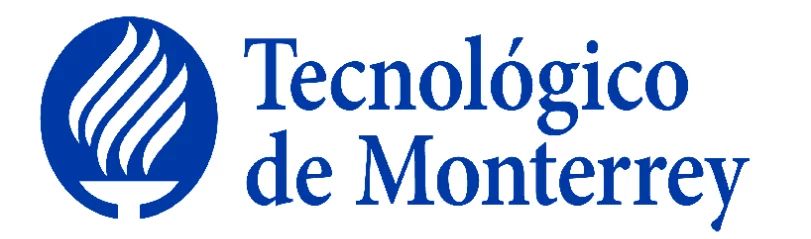
#**Actividad Semanal -- 7 Regresiones y K means**

##Rigoberto Vega Escudero, A01793132

##Materia: Ciencia De Datos

##Profesor:Maria De La Paz Rico Fernandez

##04/Noviembre/2022

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

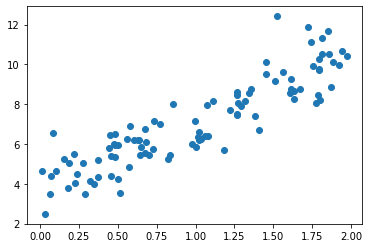

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

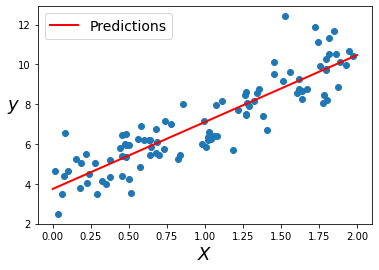

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.30X + 3.57$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

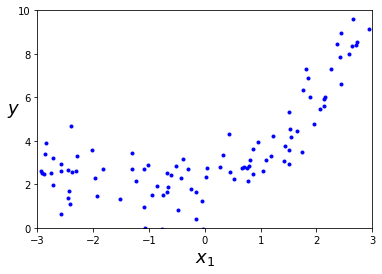

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.96X +0.96X^2 + 2.19$

Plot the data and the predictions:

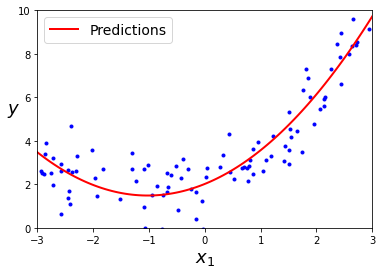

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
from sklearn.model_selection import train_test_split

In [74]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
975,7.190775,29.986147
411,4.182289,43.090662
923,6.386339,26.519476
291,3.750577,31.735861
611,4.857484,31.064895
690,5.102382,35.555645
585,4.721307,36.518337
495,4.430561,29.754691
409,4.174971,44.054180
512,4.477850,31.169604


In [75]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [26]:
len(X)

1000

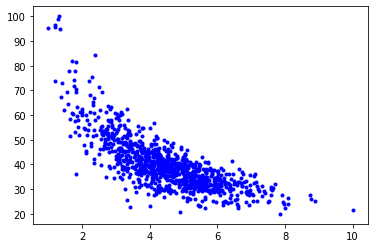

In [76]:
plt.plot(X,y,'b.')

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [80]:
#lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

Y_new = linear_reg.predict(X_test)
linear_reg.coef_, linear_reg.intercept_

(array([-6.21850698]), 67.89012908512075)

$\hat{y} =  -6.218X + 67.8901$

In [73]:
linear_reg.coef_, lin_reg.intercept_

(array([-6.21850698]), array([80227028.3104757]))

Text(0.5, 1.0, 'Lineal')

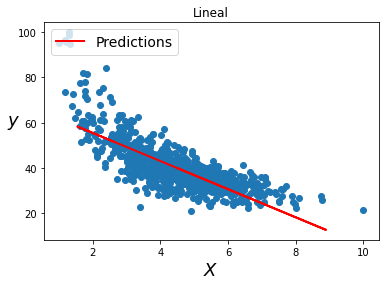

In [30]:

y_fit = linear_reg.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Lineal")

In [31]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, Y_new))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_new)))
print('r2_score',r2_score(y_test, Y_new))

Error medio Absoluto (MAE): 4.513943834797746
Root Mean Squared Error: 5.932738736518161
r2_score 0.5695897011831419


Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [82]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly_train, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-34.51814321,   5.05171512,  -0.26070502]), 114.03870684172352)

The model estimates:

$\hat{y} =  -34.518X + 5.051X^2 - 0.2607X^3  + 114.038$

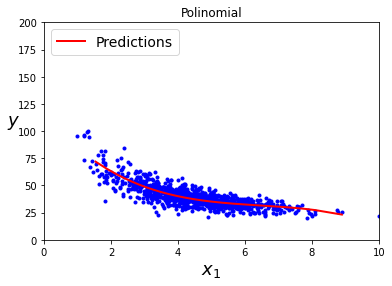

In [33]:
#polinomial

X_poly_test = poly_features.fit_transform(X_test)
y_pred = lin_reg.predict(X_poly_test)

order = np.argsort(X_test.values.ravel())

sortedXPoly = X_test.values.ravel()[order]
sortedYPoly = y_test.values.ravel()[order]
sorted_predicPoly = y_pred[order]


plt.plot(X, y, "b.")
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Polinomial")
plt.axis([0, 10, 0, 200]);

In [34]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(sortedYPoly, sorted_predicPoly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sortedYPoly, sorted_predicPoly)))
print('r2_score',r2_score(sortedYPoly, sorted_predicPoly))

Error medio Absoluto (MAE): 4.2826319819050385
Root Mean Squared Error: 5.682233156715733
r2_score 0.6051698511810613


Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [35]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [102]:
modeloRidge = Ridge(alpha= 1)
modeloRidge.fit(X_train, y_train)
modeloRidge.coef_, modeloRidge.intercept_

(array([-6.21417711]), 67.87082843984201)

$\hat{y} =  -6.2141X  + 67.8708$

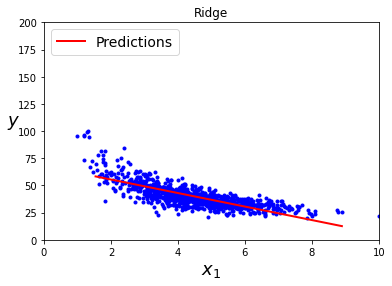

In [103]:
y_pred = modeloRidge.predict(X_test)

order = np.argsort(X_test.values.ravel())

sortedXRidge = X_test.values.ravel()[order]
sortedYRidge = y_test.values.ravel()[order]
sorted_predicRidge = y_pred[order]


plt.plot(X, y, "b.")
plt.plot(sortedXRidge, sorted_predicRidge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Ridge")
plt.axis([0, 10, 0, 200]);

In [38]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(sortedYRidge, sorted_predicRidge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sortedYRidge, sorted_predicRidge)))
print('r2_score',r2_score(sortedYRidge, sorted_predicRidge))

Error medio Absoluto (MAE): 4.5131520437583985
Root Mean Squared Error: 5.931537552576553
r2_score 0.5697639713218683


In [83]:
modeloLasso = Lasso(alpha = 1)
modeloLasso.fit(X_train, y_train)
modeloLasso.coef_, modeloLasso.intercept_

(array([-5.66108868]), 65.40540488853617)

$\hat{y} =  -5.66108868X  + 65.4054$

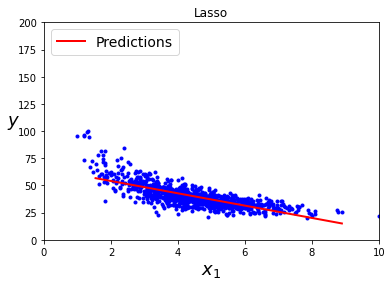

In [40]:
y_pred = modeloLasso.predict(X_test)

order = np.argsort(X_test.values.ravel())

sortedXLasso = X_test.values.ravel()[order]
sortedYLasso = y_test.values.ravel()[order]
sorted_predicLasso = y_pred[order]


plt.plot(X, y, "b.")
plt.plot(sortedXLasso, sorted_predicLasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Lasso")
plt.axis([0, 10, 0, 200]);

In [41]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(sortedYLasso, sorted_predicLasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sortedYLasso, sorted_predicLasso)))
print('r2_score',r2_score(sortedYLasso, sorted_predicLasso))

Error medio Absoluto (MAE): 4.450063719199246
Root Mean Squared Error: 5.822404969487834
r2_score 0.5854498988797452


Finalmente grafica :

- MAE (de los cuatro métodos)
- R2 (de los cuatro métodos)

Text(0.5, 1.0, 'Comparación de modelos con MAE')

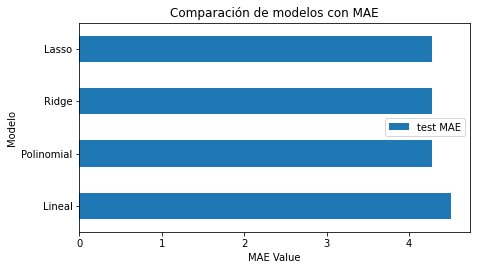

In [42]:
MAE_lineal = metrics.mean_absolute_error(y_test, Y_new)
MAE_Polinomial = metrics.mean_absolute_error(sortedYPoly, sorted_predicPoly)
MAE_Ridge = metrics.mean_absolute_error(sortedYPoly, sorted_predicPoly)
MAE_Lasso = metrics.mean_absolute_error(sortedYPoly, sorted_predicPoly)

df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [MAE_lineal, MAE_Polinomial, MAE_Ridge, MAE_Lasso]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('MAE Value')
ax.set_ylabel('Modelo')
ax.set_title('Comparación de modelos con MAE')

Text(0.5, 1.0, 'Comparación de modelos con R2')

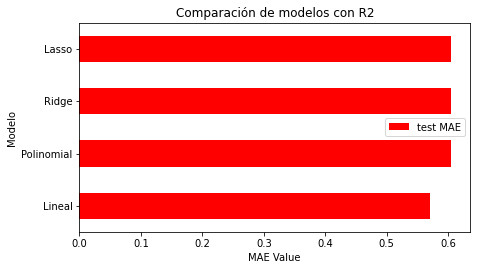

In [43]:
R2_lineal = metrics.r2_score(y_test, Y_new)
R2_Polinomial = metrics.r2_score(sortedYPoly, sorted_predicPoly)
R2_Ridge = metrics.r2_score(sortedYPoly, sorted_predicPoly)
R2_Lasso = metrics.r2_score(sortedYPoly, sorted_predicPoly)

df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [R2_lineal, R2_Polinomial, R2_Ridge, R2_Lasso]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax, color = 'red')
ax.set_xlabel('MAE Value')
ax.set_ylabel('Modelo')
ax.set_title('Comparación de modelos con R2')

Explica tus resultados,
- ¿que método conviene más a la empresa? ¿por que?

El método polynomial sin duda, podemos ver que los errores son mínimos y sus aproximaciones a son de una manera certera lo que buscamos.

- ¿que porcentajes de entrenamiento y evaluación?

Para mi análisis, tome 80% para entrenamiento y 20% para validación.

- ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Para el MAE tenemos en promedio un error de 4.5 y de R2 de 0.55. En ambos casos es un error bastante bueno, quiere decir que tenemos un desempeño bastante digno. Ya que el MAE al ser un modelo que penaliza las predicciones y mide en base que tan precisos son los modelos creo que es de entender que al ver los resultados y sobre todo como la variabilidad de los datos es baja por lo mostrado con R2 considero un desempeño bueno.

#Ejercicio 2
Casas en King Country

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [46]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [47]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


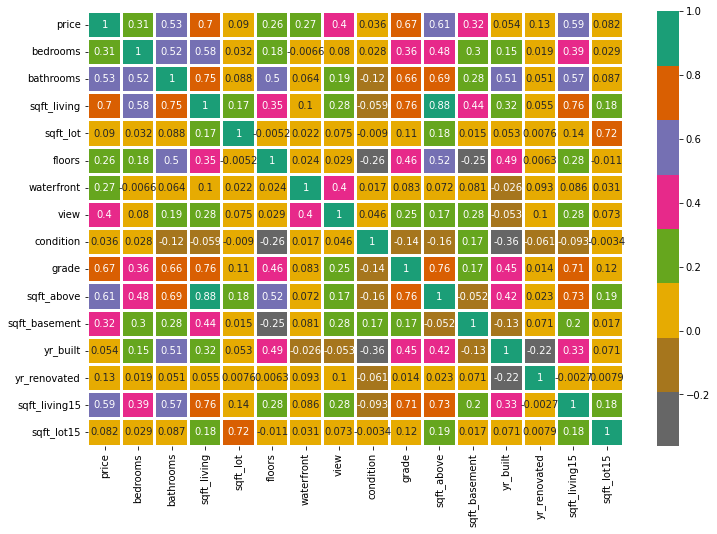

In [48]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [49]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X2 = df[features]
y2 = df[label]

In [50]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 800
Tamaño de X_train: (800, 1)
**************************************************
Mumero total de registros en el test dataset: 200
Tamaño del X_test: (200, 1)


Regresión Múltiple Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [84]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train2, y_train2)

Y_new2 = linear_reg.predict(X_test2)
linear_reg.coef_, linear_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

$\hat{y} =  -(3.82008048e+04)X1 + (4.14661380e+04)X2  + (1.07992584e+02)X3 + (1.71356997e-02)X4 + (3.16916913e+04)X5 + (5.52691023e+05)X6 + (4.12493228e+04)X7 + (2.12221443e+04)X8 + (1.19493216e+05)X9 + (4.77750271e+01)X10 + (6.02175565e+01X)11 - (3.55090216e+03)X12 + (1.32602215e+01)X13 + (2.90059284e+01)X14 - (5.48132603e-01)X15  + 6151359.2627$

In [85]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test2, Y_new2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, Y_new2)))
print('r2_score',r2_score(y_test2, Y_new2))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


In [86]:
MAE_2_lineal = metrics.mean_absolute_error(y_test2, Y_new2)
R2_2_lineal = metrics.r2_score(y_test2, Y_new2)
print(MAE_2_lineal,R2_2_lineal )

137480.1388273178 0.6579723205007814


Regresión Múltiple Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [87]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train2 = poly_features.fit_transform(X_train2)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly_train2, y_train2)
lin_reg.coef_, lin_reg.intercept_

X_poly_test2 = poly_features.fit_transform(X_test2)
y_pred2 = lin_reg.predict(X_poly_test2)




In [55]:
lin_reg.coef_, lin_reg.intercept_

(array([[ 9.33912834e+05, -1.09330730e+06, -4.56449932e+02,
         -2.78686288e+01, -2.07407238e+06, -3.95431870e+06,
         -2.88638026e+05,  5.58697570e+05,  1.09864510e+06,
         -2.19758415e+02, -3.82034272e+02, -8.59630908e+04,
         -2.95351595e+03,  3.99965710e+03, -3.40106316e+01,
          9.57541696e+02,  7.49958190e+03, -1.37969466e+01,
         -1.84926695e-02,  8.57699569e+03, -1.14965893e+04,
         -3.06588900e+02, -5.24628836e+03, -5.36788065e+03,
         -1.20757669e+00, -1.46068182e+01, -4.67099451e+02,
         -9.13191519e+00,  1.72800642e+01,  2.15500198e-01,
         -9.63429892e+03,  1.53879172e+01, -1.35842369e-01,
         -2.59067293e+04,  4.33707238e+04,  3.82942459e+03,
         -1.07592927e+03,  2.22971689e+04,  1.44292325e+01,
          1.33928361e+00,  5.03401980e+02, -1.70798805e+01,
         -1.72895923e+01, -5.56785248e-02,  1.56185890e+00,
         -4.34972758e+00,  4.83299456e+00,  1.60303193e+02,
         -1.42711737e+01,  1.31138593e+0

In [88]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('r2_score',r2_score(y_test2, y_pred2))

Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score 0.7797929072570198


In [89]:
MAE_2_Poly = metrics.mean_absolute_error(y_test2, y_pred2)
R2_2_Poly = metrics.r2_score(y_test2, y_pred2)
print(MAE_2_Poly, R2_2_Poly)

121314.06948173394 0.7797929072570198


Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

Ridge

In [90]:
modeloRidge = Ridge(alpha = 1)
modeloRidge.fit(X_train2, y_train2)
modeloRidge.coef_, lin_reg.intercept_
y_pred2 = modeloRidge.predict(X_test2)

In [91]:
modeloRidge.coef_, modeloRidge.intercept_

(array([[-3.82192265e+04,  4.14509656e+04,  1.08013951e+02,
          1.69318239e-02,  3.16891574e+04,  5.48258333e+05,
          4.14559235e+04,  2.12264347e+04,  1.19470568e+05,
          4.78066878e+01,  6.02065605e+01, -3.55050129e+03,
          1.33171890e+01,  2.89851987e+01, -5.47998512e-01]]),
 array([6150751.3836867]))

$\hat{y} =  -(3.82192265e+04)X1 + (4.14509656e+04)X2  + (1.08013951e+02)X3 + (1.69318239e-02)X4 + (3.16891574e+04)X5 + (5.48258333e+05)X6 + (4.14559235e+04)X7 + (2.12264347e+04)X8 + (1.19470568e+05)X9 + (4.78066878e+01)X10 + (6.02065605e+01)X11 - (3.55050129e+03)X12 + (1.33171890e+01)X13 + (2.89851987e+01)X14 - (5.47998512e-01)X15  + 6150751.38$

In [92]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('r2_score',r2_score(y_test2, y_pred2))

Error medio Absoluto (MAE): 137491.0433940327
Root Mean Squared Error: 232165.2426647754
r2_score 0.6578783840295006


In [93]:
MAE_2_Ridge = metrics.mean_absolute_error(y_test2, y_pred2)
R2_2_Ridge = metrics.r2_score(y_test2, y_pred2)
print(MAE_2_Ridge, R2_2_Ridge)

137491.0433940327 0.6578783840295006


Lasso

In [94]:
modeloLasso = Lasso(alpha= 0.01)
modeloLasso.fit(X_train2, np.ravel(y_train2))

y_pred2 = modeloLasso.predict(X_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [95]:
modeloLasso.coef_, modeloLasso.intercept_

(array([-3.82007921e+04,  4.14660952e+04,  2.93482224e+02,  1.71356245e-02,
         3.16916458e+04,  5.52689524e+05,  4.12493792e+04,  2.12221167e+04,
         1.19493202e+05, -1.37714566e+02, -1.25272065e+02, -3.55090164e+03,
         1.32602477e+01,  2.90059224e+01, -5.48132637e-01]), 6151358.471252684)

$\hat{y} =  -(-3.82008036e+04)X1 + (4.14661337e+04)X2  + (2.93482240e+02)X3 - (1.71356922e-02)X4 + (3.16916868e+04)X5 + (5.52690873e+05)X6 + (4.12493284e+04)X7 + (2.12221415e+04)X8 + (1.19458140e+05)X9 - (1.37714624e+02)X10 - (1.25272098e+02)X11 - (3.55090211e+03)X12 + (1.32602241e+01)X13 + (2.90059278e+01)X14 - (5.48132606e-01)X15  + 6151358.4712$

In [96]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('r2_score',r2_score(y_test2, y_pred2))

Error medio Absoluto (MAE): 137480.14315454173
Root Mean Squared Error: 232133.37922044084
r2_score 0.6579722863283719


In [97]:
MAE_2_Lasso = metrics.mean_absolute_error(y_test2, y_pred2)
R2_2_Lasso = metrics.r2_score(y_test2, y_pred2)
print(MAE_2_Lasso, R2_2_Lasso)

137480.14315454173 0.6579722863283719


Finalmente grafica :

- MAE (de los cuatro métodos)
- R2 (de los cuatro métodos)

Text(0.5, 1.0, 'Comparación de modelos con MAE')

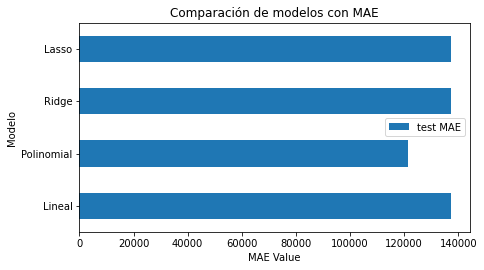

In [98]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [MAE_2_lineal, MAE_2_Poly, MAE_2_Ridge, MAE_2_Lasso]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('MAE Value')
ax.set_ylabel('Modelo')
ax.set_title('Comparación de modelos con MAE')

Text(0.5, 1.0, 'Comparación de modelos con R2')

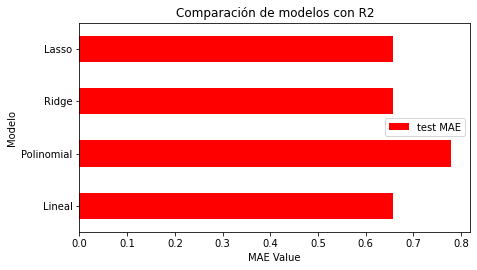

In [99]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test MAE': [R2_2_lineal, R2_2_Poly, R2_2_Ridge, R2_2_Lasso]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax, color = 'red')
ax.set_xlabel('MAE Value')
ax.set_ylabel('Modelo')
ax.set_title('Comparación de modelos con R2')

Explica tus resultados, 
- que método se aproxima mejor, ¿por que? 
Me sigo inclinando por el modelo polinomial, creo que aunque tiene más varianza total de los datos, sigue teniendo menor error en las predicciones, esto dicho bajo el valor de MAE.

- ¿que porcentajes de entrenamiento y evaluación? 

Para este caso se tiene 90% a entrenamiento y 10% a validación.


- ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Tenemos un promedio de la diferencia absoluta de las predicciones y los datos esperados de alrededor de 130000 indicado por el MAE y además una proporción de la varianza de las variables dependientes de solo el 0.7 en promedio. Creo que por el tamaño de datos esperados se pudo hacer una normalización para representar estos largos valores en una escala más manejable a interpretación. Pero aun con ello considero buen rendimiento en general de los modelos.

#Agrega las conclusiones

En conclusión definitivamente fue una práctica donde pude entender aún mejor el funcionamiento de los métodos de regresión y además el cómo evaluarlos para elegir el mejor. Pero más que nada agradezco practicas donde seamos capaces de aplicar los conocimientos adquiridos en problemas reales y con ello tener un mejor entendimiento de las variables, donde por ejemplo el tratar de predecir un valor de una casa en base a un problema de regresión lineal múltiple y como usar los distintos modelos para aproximas las estimaciones y tener ese modelo lo mejor optimizado posible a dichas aproximaciones.

#Referencias:

- Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
- Which Metric is Better? Obtenido de https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e
- Rodrigo, J. A. (10 de 2020). Regresión lineal con Python. Obtenido de https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

